In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


import matplotlib.pylab as plt
from matplotlib.cm import YlOrBr

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import os
import re

import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [3]:
data_frames_1 = list()

for _, _, files in tqdm.tqdm_notebook(os.walk('Banana1/Data')):
    nparray_files = np.array(files)
    nparray_files.sort()
    for file in nparray_files:
        #file_obj = open('Week_Measurm_avocado_data/'+file, 'r')
        data_frame = pd.read_csv('Banana1/Data/'+file, delim_whitespace=True, header=None)
        data_frame.columns = ['Channel', 'Magnitude']
        data_frames_1.append(data_frame)
        
data_frames_2 = list()

for _, _, files in tqdm.tqdm_notebook(os.walk('Banana2/Data')):
    nparray_files = np.array(files)
    nparray_files.sort()
    for file in nparray_files:
        #file_obj = open('Week_Measurm_avocado_data/'+file, 'r')
        data_frame = pd.read_csv('Banana2/Data/'+file, delim_whitespace=True, header=None)
        data_frame.columns = ['Channel', 'Magnitude']
        data_frames_2.append(data_frame)
        
        
data_frames_3 = list()

for _, _, files in tqdm.tqdm_notebook(os.walk('Banana3/Data')):
    nparray_files = np.array(files)
    nparray_files.sort()
    for file in nparray_files:
        #file_obj = open('Week_Measurm_avocado_data/'+file, 'r')
        data_frame = pd.read_csv('Banana3/Data/'+file, delim_whitespace=True, header=None)
        data_frame.columns = ['Channel', 'Magnitude']
        data_frames_3.append(data_frame)

        
data_frames_4 = list()

for _, _, files in tqdm.tqdm_notebook(os.walk('Banana4/Data')):
    nparray_files = np.array(files)
    nparray_files.sort()
    for file in nparray_files:
        #file_obj = open('Week_Measurm_avocado_data/'+file, 'r')
        data_frame = pd.read_csv('Banana4/Data/'+file, delim_whitespace=True, header=None)
        data_frame.columns = ['Channel', 'Magnitude']
        data_frames_4.append(data_frame)

        
data_frames_5 = list()

for _, _, files in tqdm.tqdm_notebook(os.walk('Banana5/Data')):
    nparray_files = np.array(files)
    nparray_files.sort()
    for file in nparray_files:
        #file_obj = open('Week_Measurm_avocado_data/'+file, 'r')
        data_frame = pd.read_csv('Banana5/Data/'+file, delim_whitespace=True, header=None)
        data_frame.columns = ['Channel', 'Magnitude']
        data_frames_5.append(data_frame)

In [4]:
## BANANA 1

Data1 = data_frames_1[0]
for i in tqdm.notebook.tqdm(range(1, len(data_frames_1)-1)):
    Data1 = pd.merge(Data1, data_frames_1[i], how='outer', on='Channel')
    
# Уберем колонку с номером канала за ненадобностью
Data1.drop('Channel', inplace=True, axis=1)
Data1 = pd.DataFrame(Data1.T.values)


## BANANA 2

Data2 = data_frames_2[0]
for i in tqdm.notebook.tqdm(range(1, len(data_frames_2)-1)):
    Data2 = pd.merge(Data2, data_frames_2[i], how='outer', on='Channel')
    
# Уберем колонку с номером канала за ненадобностью
Data2.drop('Channel', inplace=True, axis=1)
Data2 = pd.DataFrame(Data2.T.values)



## BANANA 3

Data3 = data_frames_3[0]
for i in tqdm.notebook.tqdm(range(1, len(data_frames_3)-1)):
    Data3 = pd.merge(Data3, data_frames_3[i], how='outer', on='Channel')
    
# Уберем колонку с номером канала за ненадобностью
Data3.drop('Channel', inplace=True, axis=1)
Data3 = pd.DataFrame(Data3.T.values)



## BANANA 4

Data4 = data_frames_4[0]
for i in tqdm.notebook.tqdm(range(1, len(data_frames_4)-1)):
    Data4 = pd.merge(Data4, data_frames_4[i], how='outer', on='Channel')
    
# Уберем колонку с номером канала за ненадобностью
Data4.drop('Channel', inplace=True, axis=1)
Data4 = pd.DataFrame(Data4.T.values)



## BANANA 5

Data5 = data_frames_5[0]
for i in tqdm.notebook.tqdm(range(1, len(data_frames_5)-1)):
    Data5 = pd.merge(Data5, data_frames_5[i], how='outer', on='Channel')
    
# Уберем колонку с номером канала за ненадобностью
Data5.drop('Channel', inplace=True, axis=1)
Data5 = pd.DataFrame(Data5.T.values)

# Загрузка бэкграунда

In [5]:
data_bg_frames_1 = list()

for _, _, files in tqdm.notebook.tqdm(os.walk('Banana1/Data_bg')):
    nparray_files = np.array(files)
    nparray_files.sort()
    for file in nparray_files:
        data_bg_frame = pd.read_csv('Banana1/Data_bg/'+file, delim_whitespace=True, header=None)
        data_bg_frame.columns = ['Channel', 'Magnitude']
        data_bg_frames_1.append(data_bg_frame)
        
        
data_bg_frames_2 = list()

for _, _, files in tqdm.notebook.tqdm(os.walk('Banana2/Data_bg')):
    nparray_files = np.array(files)
    nparray_files.sort()
    for file in nparray_files:
        data_bg_frame = pd.read_csv('Banana2/Data_bg/'+file, delim_whitespace=True, header=None)
        data_bg_frame.columns = ['Channel', 'Magnitude']
        data_bg_frames_2.append(data_bg_frame)
        
        
        
data_bg_frames_3 = list()

for _, _, files in tqdm.notebook.tqdm(os.walk('Banana3/Data_bg')):
    nparray_files = np.array(files)
    nparray_files.sort()
    for file in nparray_files:
        data_bg_frame = pd.read_csv('Banana3/Data_bg/'+file, delim_whitespace=True, header=None)
        data_bg_frame.columns = ['Channel', 'Magnitude']
        data_bg_frames_3.append(data_bg_frame)
        


data_bg_frames_4 = list()

for _, _, files in tqdm.notebook.tqdm(os.walk('Banana4/Data_bg')):
    nparray_files = np.array(files)
    nparray_files.sort()
    for file in nparray_files:
        data_bg_frame = pd.read_csv('Banana4/Data_bg/'+file, delim_whitespace=True, header=None)
        data_bg_frame.columns = ['Channel', 'Magnitude']
        data_bg_frames_4.append(data_bg_frame)
        
        
        
data_bg_frames_5 = list()

for _, _, files in tqdm.notebook.tqdm(os.walk('Banana5/Data_bg')):
    nparray_files = np.array(files)
    nparray_files.sort()
    for file in nparray_files:
        data_bg_frame = pd.read_csv('Banana5/Data_bg/'+file, delim_whitespace=True, header=None)
        data_bg_frame.columns = ['Channel', 'Magnitude']
        data_bg_frames_5.append(data_bg_frame)

In [6]:
Data1_bg = data_bg_frames_1[0]
for i in tqdm.notebook.tqdm(range(1, len(data_bg_frames_1)-1)):
    Data1_bg = pd.merge(Data1_bg, data_bg_frames_1[i], how='outer', on='Channel')
    
# Уберем колонку с номером канала за ненадобностью
Data1_bg.drop('Channel', inplace=True, axis=1)

# Переименуем колонки в номера измерений и транспонируем

Data1_bg = pd.DataFrame(Data1_bg.T.values)



Data2_bg = data_bg_frames_2[0]
for i in tqdm.notebook.tqdm(range(1, len(data_bg_frames_2)-1)):
    Data2_bg = pd.merge(Data2_bg, data_bg_frames_2[i], how='outer', on='Channel')
    
# Уберем колонку с номером канала за ненадобностью
Data2_bg.drop('Channel', inplace=True, axis=1)

# Переименуем колонки в номера измерений и транспонируем

Data2_bg = pd.DataFrame(Data2_bg.T.values)




Data3_bg = data_bg_frames_3[0]
for i in tqdm.notebook.tqdm(range(1, len(data_bg_frames_3)-1)):
    Data3_bg = pd.merge(Data3_bg, data_bg_frames_3[i], how='outer', on='Channel')
    
# Уберем колонку с номером канала за ненадобностью
Data3_bg.drop('Channel', inplace=True, axis=1)

# Переименуем колонки в номера измерений и транспонируем

Data3_bg = pd.DataFrame(Data3_bg.T.values)




Data4_bg = data_bg_frames_4[0]
for i in tqdm.notebook.tqdm(range(1, len(data_bg_frames_4)-1)):
    Data4_bg = pd.merge(Data4_bg, data_bg_frames_4[i], how='outer', on='Channel')
    
# Уберем колонку с номером канала за ненадобностью
Data4_bg.drop('Channel', inplace=True, axis=1)

# Переименуем колонки в номера измерений и транспонируем

Data4_bg = pd.DataFrame(Data4_bg.T.values)




Data5_bg = data_bg_frames_5[0]
for i in tqdm.notebook.tqdm(range(1, len(data_bg_frames_5)-1)):
    Data5_bg = pd.merge(Data5_bg, data_bg_frames_5[i], how='outer', on='Channel')
    
# Уберем колонку с номером канала за ненадобностью
Data5_bg.drop('Channel', inplace=True, axis=1)

# Переименуем колонки в номера измерений и транспонируем

Data5_bg = pd.DataFrame(Data5_bg.T.values)

# Вычтем бэкграунд

In [7]:
Data1 = Data1 - Data1_bg
Data2 = Data2 - Data2_bg
Data3 = Data3 - Data3_bg
Data4 = Data4 - Data4_bg
Data5 = Data5 - Data5_bg

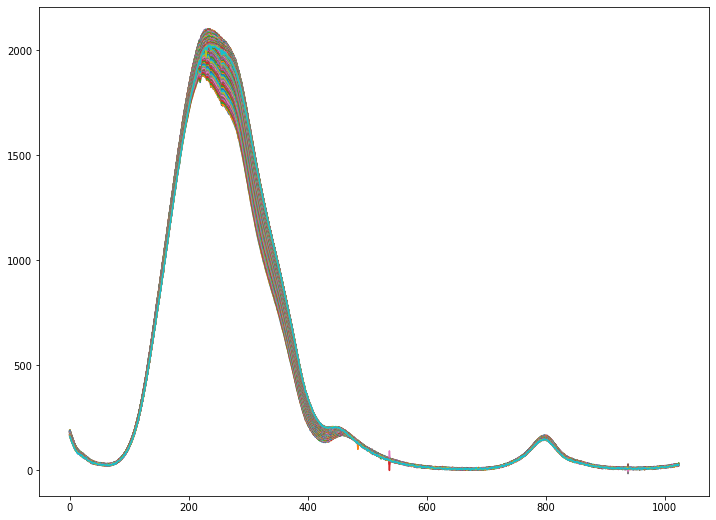

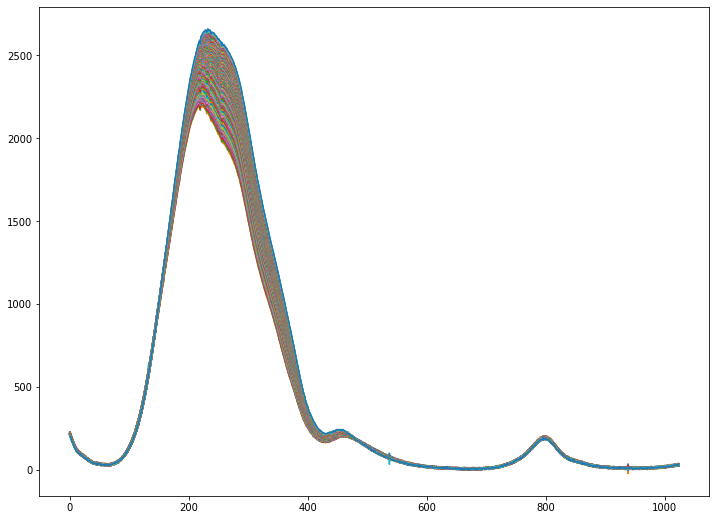

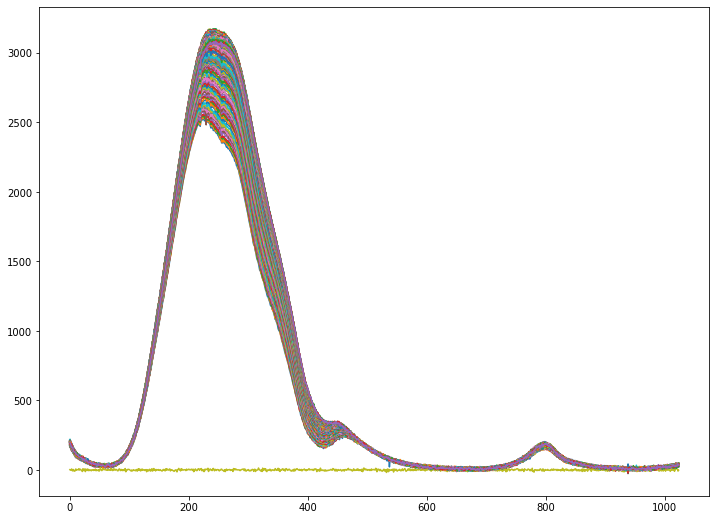

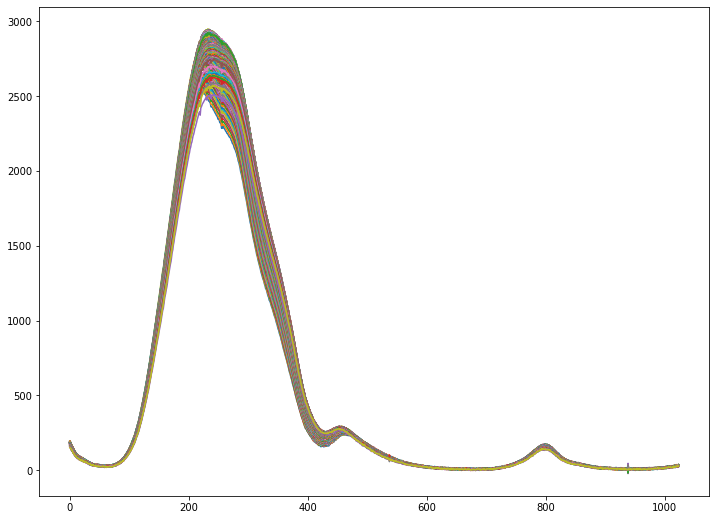

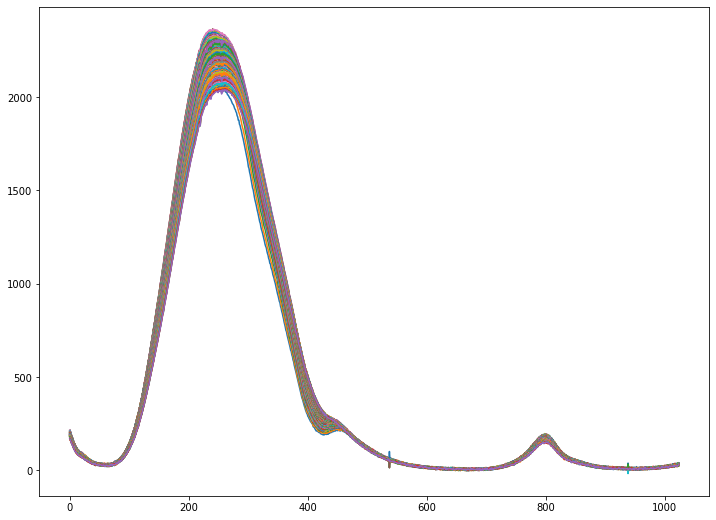

In [8]:
for data in [Data1, Data2, Data3, Data4, Data5]:
    plt.figure(figsize=(12,9))
    for spec in data.values:
        plt.plot(spec)

In [9]:
np.where(Data3[200].values == Data3[200].values.min())

(array([148]),)

In [10]:
Data3.iloc[148,:]

0        2.0
1       -2.0
2        1.0
3        7.0
4       -5.0
        ... 
1019    12.0
1020     9.0
1021     7.0
1022    -8.0
1023    -2.0
Name: 148, Length: 1024, dtype: float64

In [11]:
Data3.drop(148, inplace=True)

In [12]:
plt.style.use('ggplot')

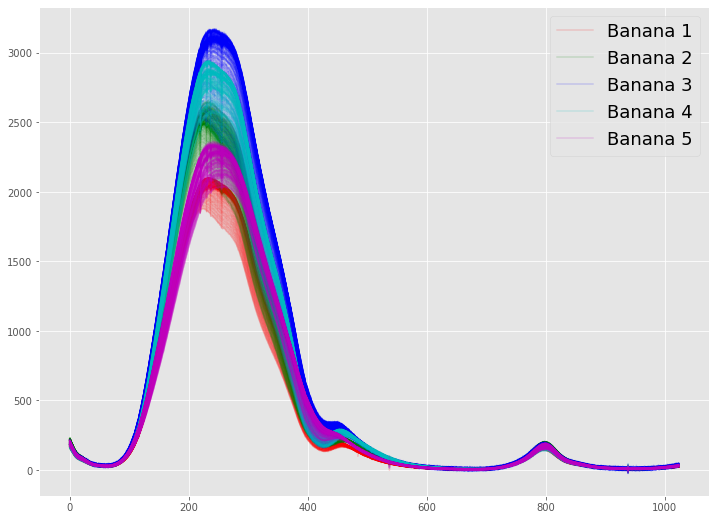

In [13]:
plt.figure(figsize=(12,9))
for cl, data in zip([('r','Banana 1'),('g', 'Banana 2'),('b', 'Banana 3'),
                     ('c', 'Banana 4'), ('m', 'Banana 5')],
                    [Data1, Data2, Data3, Data4, Data5]):
    for spec in data.values:
        plt.plot(spec, c=cl[0], alpha=0.15)
    plt.plot(spec, c=cl[0], alpha=0.15, label=cl[1])
plt.legend(fontsize=18)

In [14]:
import matplotlib.cm as CM

In [15]:
plt.style.use('ggplot')

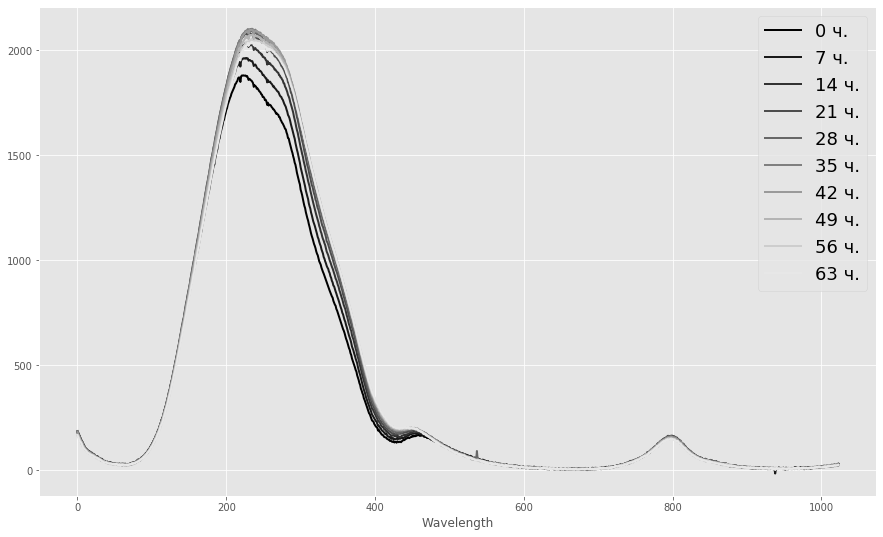

In [16]:
plt.figure(figsize=(15,9))
for spec, c_id, target in zip(Data1.values[::14], np.linspace(0, 1, Data1.shape[0])[::14], range(Data1.shape[0])[::14]) :
    plt.plot(spec, c=(c_id,c_id,c_id), linewidth=2, label='{} ч.'.format(int(target*0.5)))
# plt.plot(spec, c='white', label='Banana 5')
plt.xlabel('Wavelength')
plt.legend(fontsize=18)

## Нормализуем спектры

In [17]:
mms = MinMaxScaler()
Data1 = pd.DataFrame(mms.fit_transform(Data1.T).T)
Data2 = pd.DataFrame(mms.fit_transform(Data2.T).T)
Data3 = pd.DataFrame(mms.fit_transform(Data3.T).T)
Data4 = pd.DataFrame(mms.fit_transform(Data4.T).T)
Data5 = pd.DataFrame(mms.fit_transform(Data5.T).T)

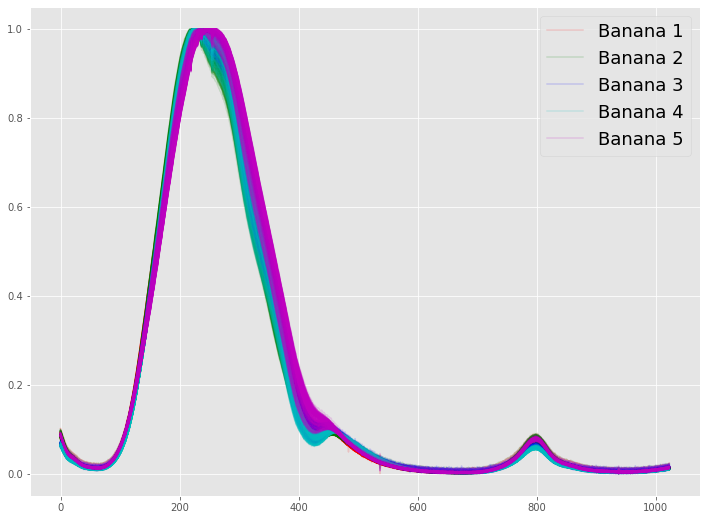

In [18]:
plt.figure(figsize=(12,9))
for cl, data in zip([('r','Banana 1'),('g', 'Banana 2'),('b', 'Banana 3'),
                     ('c', 'Banana 4'), ('m', 'Banana 5')],
                    [Data1, Data2, Data3, Data4, Data5]):
    for spec in data.values:
        plt.plot(spec, c=cl[0], alpha=0.15)
    plt.plot(spec, c=cl[0], alpha=0.15, label=cl[1])
plt.legend(fontsize=18)

## Свернем через PCA 

### 1) Каждый набор спектров -- свой PCA

In [19]:
pca_model_1 = PCA(n_components=1)
pca_model_2 = PCA(n_components=1)
pca_model_3 = PCA(n_components=1)
pca_model_4 = PCA(n_components=1)
pca_model_5 = PCA(n_components=1)

PCA_Data_1 = pd.DataFrame(pca_model_1.fit_transform(Data1))
PCA_Data_2 = pd.DataFrame(pca_model_2.fit_transform(Data2))
PCA_Data_3 = pd.DataFrame(pca_model_3.fit_transform(Data3))
PCA_Data_4 = pd.DataFrame(pca_model_4.fit_transform(Data4))
PCA_Data_5 = pd.DataFrame(pca_model_5.fit_transform(Data5))

PCA_Data_1['target'] = range(PCA_Data_1.shape[0])
PCA_Data_2['target'] = range(PCA_Data_2.shape[0])
PCA_Data_3['target'] = range(PCA_Data_3.shape[0])
PCA_Data_4['target'] = range(PCA_Data_4.shape[0])
PCA_Data_5['target'] = range(PCA_Data_5.shape[0])

PCA_Data_1.to_csv('PCA_Banana_1.csv', index=0)
PCA_Data_2.to_csv('PCA_Banana_2.csv', index=0)
PCA_Data_3.to_csv('PCA_Banana_3.csv', index=0)
PCA_Data_4.to_csv('PCA_Banana_4.csv', index=0)
PCA_Data_5.to_csv('PCA_Banana_5.csv', index=0)

In [20]:
PCA_DATA = pd.concat([PCA_Data_1, PCA_Data_2, PCA_Data_3,
                      PCA_Data_4, PCA_Data_5], axis=0)

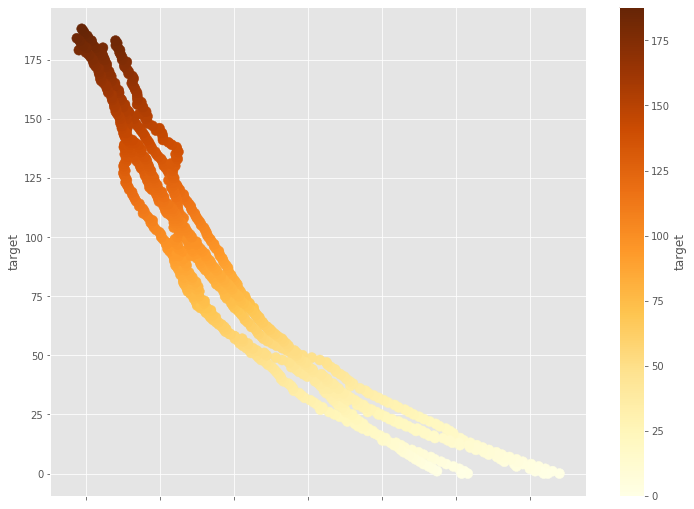

In [21]:
PCA_DATA.plot.scatter(x=0,y='target', c='target', cmap='YlOrBr', figsize=(12,9), s=100)

### 2) PCA обучился на одном наборе спектров, все остальные проецировались на него

In [22]:
pca_model = PCA(n_components=3)

PCA_Data_1 = pd.DataFrame(pca_model.fit_transform(Data1))
PCA_Data_2 = pd.DataFrame(pca_model.transform(Data2))
PCA_Data_3 = pd.DataFrame(pca_model.transform(Data3))
PCA_Data_4 = pd.DataFrame(pca_model.transform(Data4))
PCA_Data_5 = pd.DataFrame(pca_model.transform(Data5))

PCA_Data_1['target'] = range(PCA_Data_1.shape[0])
PCA_Data_2['target'] = range(PCA_Data_2.shape[0])
PCA_Data_3['target'] = range(PCA_Data_3.shape[0])
PCA_Data_4['target'] = range(PCA_Data_4.shape[0])
PCA_Data_5['target'] = range(PCA_Data_5.shape[0])

In [23]:
PCA_DATA = pd.concat([PCA_Data_1, PCA_Data_2, PCA_Data_3,
                      PCA_Data_4, PCA_Data_5], axis=0)

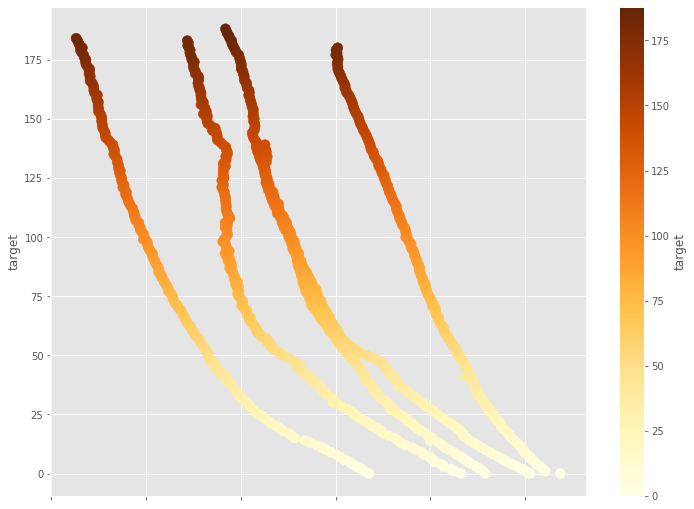

In [24]:
PCA_DATA.plot.scatter(x=0,y='target', c='target', cmap='YlOrBr', figsize=(12,9), s=100)

### 3) PCA обучился на всех кроме одного, остальной проецировался на полученную модель

In [25]:
pca_model = PCA(n_components=3)

Data = pd.concat([Data1, Data2, Data3, Data4], axis=0)
pca_model.fit(Data)

PCA_Data_1 = pd.DataFrame(pca_model.transform(Data1))
PCA_Data_2 = pd.DataFrame(pca_model.transform(Data2))
PCA_Data_3 = pd.DataFrame(pca_model.transform(Data3))
PCA_Data_4 = pd.DataFrame(pca_model.transform(Data4))
PCA_Data_5 = pd.DataFrame(pca_model.transform(Data5))

PCA_Data_1['target'] = range(PCA_Data_1.shape[0])
PCA_Data_2['target'] = range(PCA_Data_2.shape[0])
PCA_Data_3['target'] = range(PCA_Data_3.shape[0])
PCA_Data_4['target'] = range(PCA_Data_4.shape[0])
PCA_Data_5['target'] = range(PCA_Data_5.shape[0])

In [26]:
PCA_DATA = pd.concat([PCA_Data_1, PCA_Data_2, PCA_Data_3,
                      PCA_Data_4], axis=0)

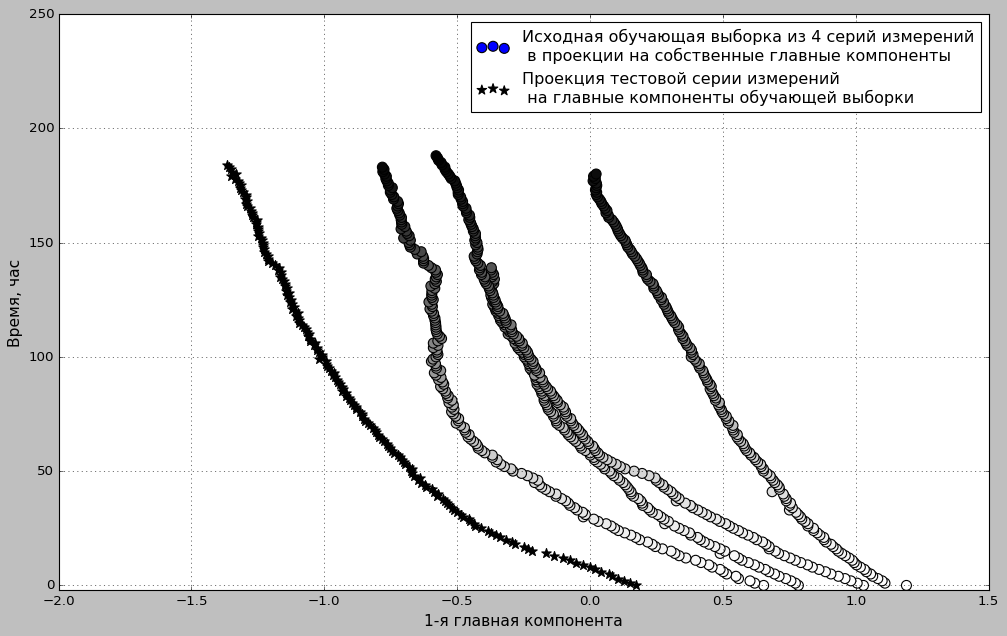

In [33]:
plt.figure(figsize=(15,9))
plt.style.use('classic')

plt.ylim(-2, 250)
plt.scatter(PCA_DATA[0], PCA_DATA['target'], c=PCA_DATA['target'], cmap='Greys', s=80,
            label='Исходная обучающая выборка из 4 серий измерений\n в проекции на собственные главные компоненты')
plt.scatter(PCA_Data_5[0], PCA_Data_5['target'], marker = '*', c='black', s=80,
            label='Проекция тестовой серии измерений\n на главные компоненты обучающей выборки')

plt.xlabel('1-я главная компонента', fontsize=14)
plt.ylabel('Время, час', fontsize=14)
plt.grid()
plt.legend()

In [104]:
StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

In [180]:
%config InlineBackend.figure_format = 'retina'

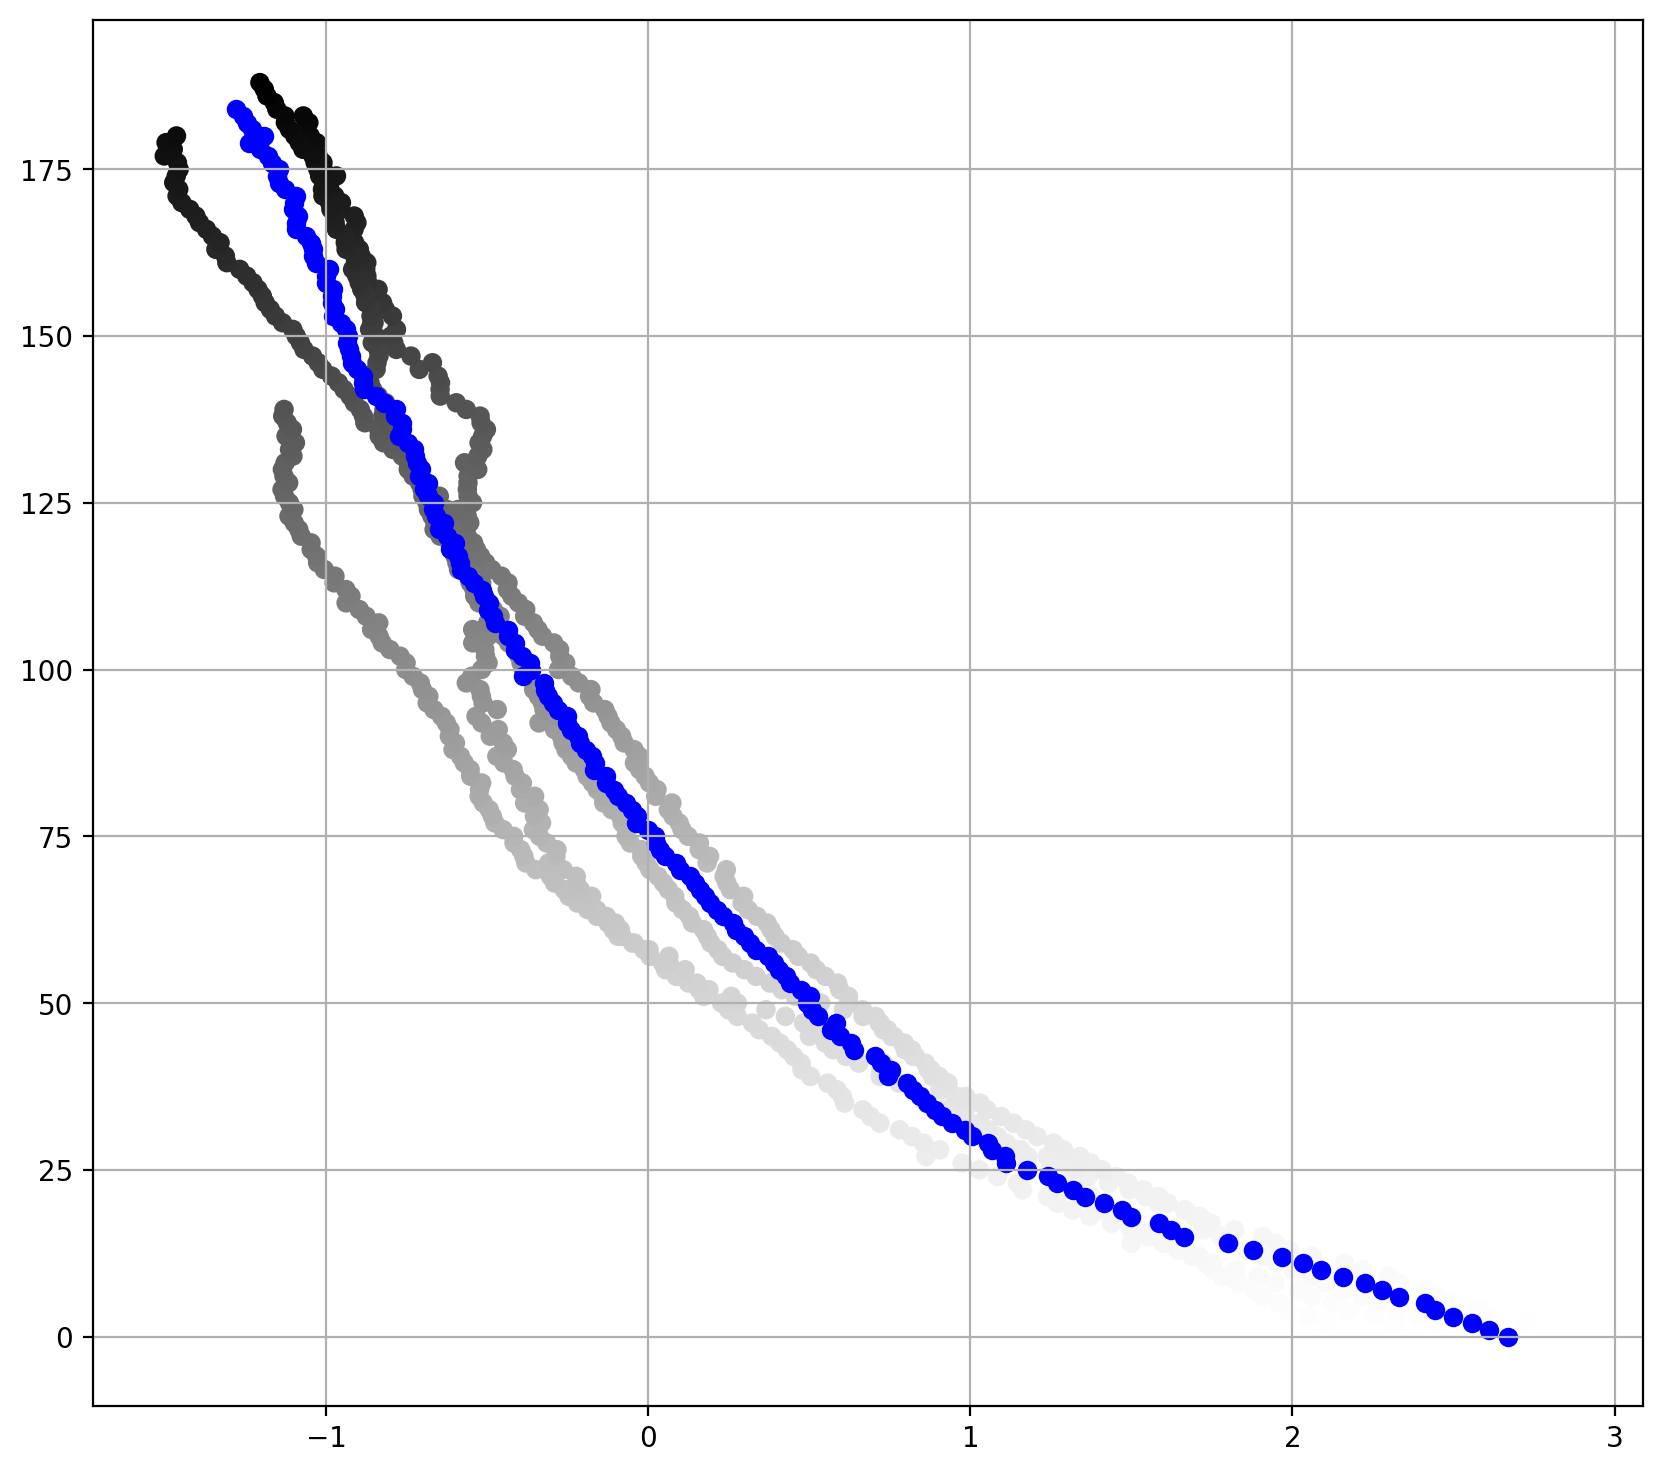

In [183]:
from sklearn.preprocessing import StandardScaler

PCA_Data_1[0] = StandardScaler().fit_transform(PCA_Data_1[0].values.reshape(PCA_Data_1.shape[0], 1))
PCA_Data_2[0] = StandardScaler().fit_transform(PCA_Data_2[0].values.reshape(PCA_Data_2.shape[0], 1))
PCA_Data_3[0] = StandardScaler().fit_transform(PCA_Data_3[0].values.reshape(PCA_Data_3.shape[0], 1))
PCA_Data_4[0] = StandardScaler().fit_transform(PCA_Data_4[0].values.reshape(PCA_Data_4.shape[0], 1))
PCA_Data_5[0] = StandardScaler().fit_transform(PCA_Data_5[0].values.reshape(PCA_Data_5.shape[0], 1))

PCA_DATA = pd.concat([PCA_Data_1, PCA_Data_2, PCA_Data_3,
                      PCA_Data_4], axis=0)


plt.figure(figsize=(10,9))

plt.scatter(PCA_DATA[0], PCA_DATA['target'], c=PCA_DATA['target'], cmap='Greys')
plt.scatter(PCA_Data_5[0], PCA_Data_5['target'], c='blue')
plt.grid()

In [140]:
Val_Data = pd.DataFrame(columns=['PC', 'squared', 'qubed', 'exp'])
Exam_Data = pd.DataFrame(columns=['PC', 'squared', 'qubed', 'exp'])

Val_Data['PC'] = PCA_DATA[0].values
Exam_Data['PC'] = PCA_Data_5[0].values

Val_Data['squared'] = Val_Data['PC'].values**2
Exam_Data['squared'] = Exam_Data['PC'].values**2

Val_Data['qubed'] = Val_Data['PC'].values**3
Exam_Data['qubed'] = Exam_Data['PC'].values**3

Val_Data['exp'] = np.exp(-Val_Data['PC'].values)
Exam_Data['exp'] = np.exp(-Exam_Data['PC'].values)

Val_Data['target'] = PCA_DATA.target.values
Exam_Data['target'] = PCA_Data_5.target.values

### Validation

In [142]:
# Train_X = Val_Data.drop('target',axis=1).iloc[:int(Val_Data.shape[0]*0.8),:]
# Test_X = Val_Data.drop('target',axis=1).iloc[int(Val_Data.shape[0]*0.8):,:]
# Train_y = Val_Data['target'].iloc[:int(Val_Data.shape[0]*0.8)]
# Test_y = Val_Data['target'].iloc[int(Val_Data.shape[0]*0.8):]

Train_X, Test_X, Train_y, Test_y = train_test_split(Val_Data.drop('target',axis=1), Val_Data['target'],
                                                   test_size=0.2, random_state=2)

In [143]:
ComparingfDF = pd.DataFrame(index=pd.MultiIndex.from_tuples(
              [('LinReg','MAE'),('LinReg','RMSE'),
               ('Ridge', 'MAE'),('Ridge', 'RMSE'),
               ('GB', 'MAE'), ('GB', 'RMSE'),
               ('KNN', 'MAE'), ('KNN', 'RMSE')],
                 names=['Estimator','Metrics']),
                          columns=['Validation', 'Exam'])

In [144]:
ComparingfDF

Validation Exam
Estimator Metrics                
LinReg    MAE            NaN  NaN
          RMSE           NaN  NaN
Ridge     MAE            NaN  NaN
          RMSE           NaN  NaN
GB        MAE            NaN  NaN
          RMSE           NaN  NaN
KNN       MAE            NaN  NaN
          RMSE           NaN  NaN

In [158]:
plt.style.use('default')

Validation : 
MAE = 5.71 hours
RMSE = 7.32 hours
EXAM :
MAE = 2.57 hours
RMSE = 3.23 hours


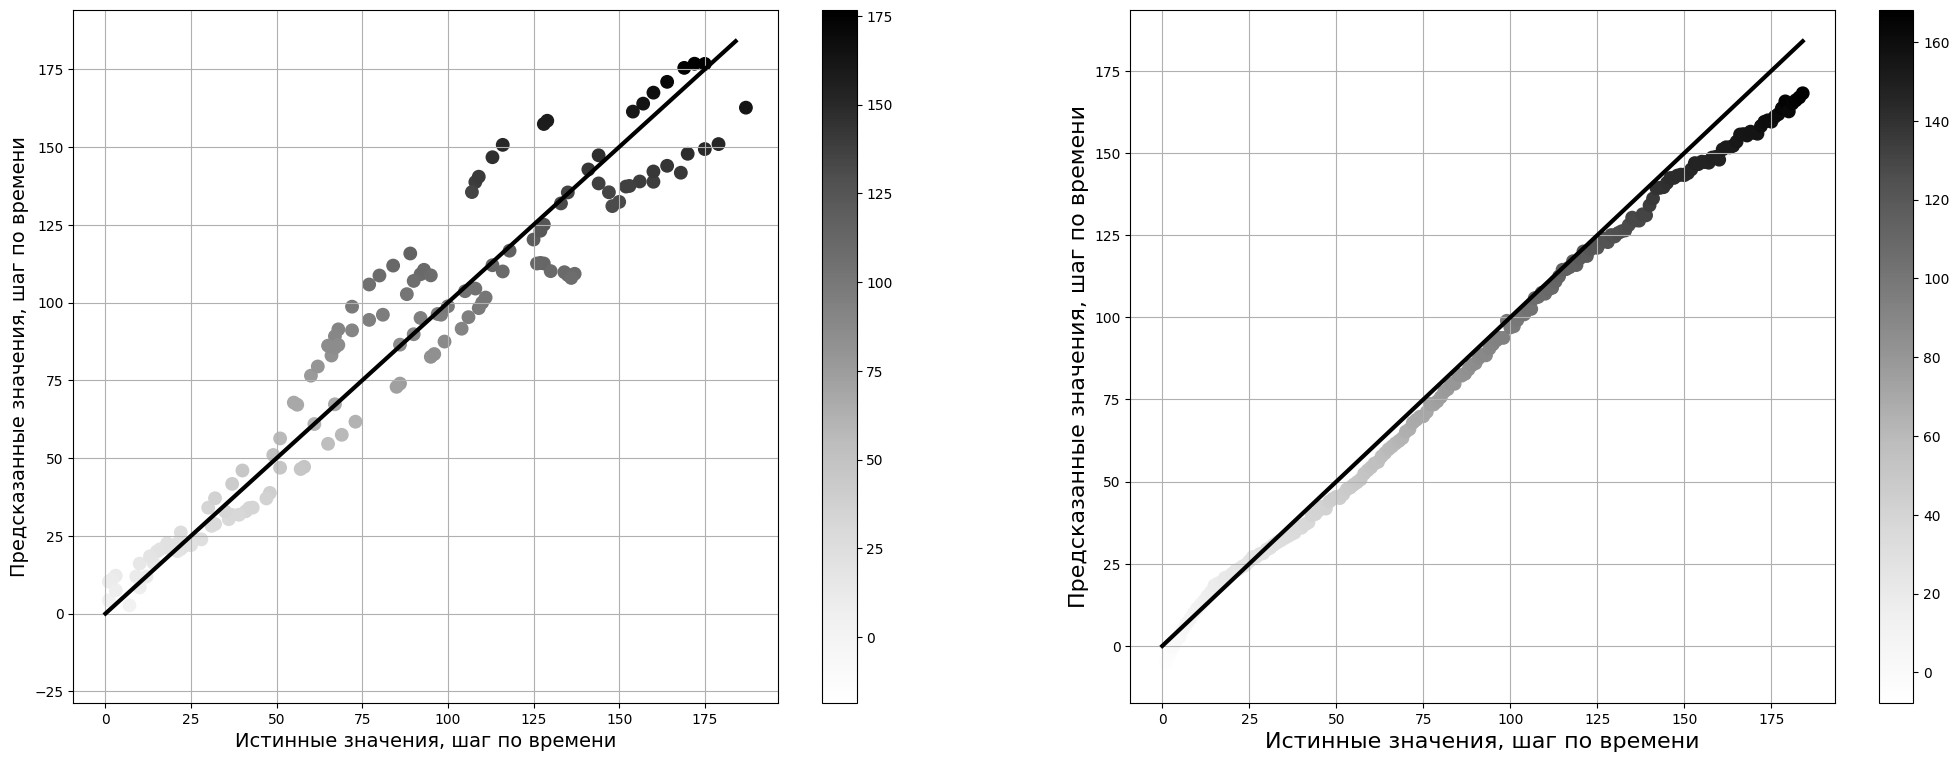

In [178]:
linreg = LinearRegression(normalize=True)
linreg.fit(Train_X, Train_y)
preds = linreg.predict(Test_X)
print ('Validation : ')
print ('MAE =', np.round(MAE(Test_y, preds)*0.5, 2),'hours')
print ('RMSE =', np.round(np.sqrt(MSE(Test_y, preds))*0.5, 2),'hours')


ex_preds = linreg.predict(Exam_Data.drop('target', axis=1))
print ('EXAM :')
print ('MAE =', np.round(MAE(Exam_Data.target.values, ex_preds)*0.5,2),'hours')
print ('RMSE =', np.round(np.sqrt(MSE(Exam_Data.target.values, ex_preds))*0.5,2),'hours')


ComparingfDF.loc['LinReg', 'Validation'] = np.array([np.round(MAE(Test_y, preds)*0.5, 2),
                                            np.round(np.sqrt(MSE(Test_y, preds))*0.5, 2)])
ComparingfDF.loc['LinReg', 'Exam'] = np.array([np.round(MAE(Exam_Data.target.values, ex_preds)*0.5,2),
                                      np.round(np.sqrt(MSE(Exam_Data.target.values, ex_preds))*0.5,2)])

# df_val = pd.DataFrame(columns=['true_val', 'preds_val'])
# df_ex = pd.DataFrame(columns=['true_exam', 'preds_exam'])

# df_val['true_val'] = Test_y.values
# df_val['preds_val'] = preds
# df_ex['true_exam'] = Exam_Data.target.values
# df_ex['preds_exam'] = ex_preds

fig = plt.figure(figsize=(25,9))
ax1 = fig.add_subplot(121)
# ax1.set_title('Validation', fontsize=18)
ax1.set_xlabel('Истинные значения, шаг по времени', fontsize=14)
ax1.set_ylabel('Предсказанные значения, шаг по времени', fontsize=14)
plt.scatter(Test_y, preds, c=preds, cmap='Greys', s=80)
plt.plot(Exam_Data.target.values, Exam_Data.target.values, c='black', linewidth=3)
plt.colorbar()
ax1.grid()


ax2 = fig.add_subplot(122)
# ax2.set_title('Examination', fontsize=18)
ax2.set_xlabel('Истинные значения, шаг по времени', fontsize=16)
ax2.set_ylabel('Предсказанные значения, шаг по времени', fontsize=16)
plt.scatter(Exam_Data.target.values, ex_preds, c=ex_preds, cmap='Greys', s=80)
plt.plot(Exam_Data.target.values, Exam_Data.target.values, c='black', linewidth=3)
plt.colorbar()
ax2.grid()

$$\hat{y} = w_1x + w_2 x^2 + w_3 x^3 + w_4 e^{-x}$$

$$MSE = \sum\limits_{i=1}^N (y - \hat{y})^2$$

Validation : 
MAE = 5.91 hours
RMSE = 7.48 hours
EXAM :
MAE = 2.4 hours
RMSE = 3.32 hours


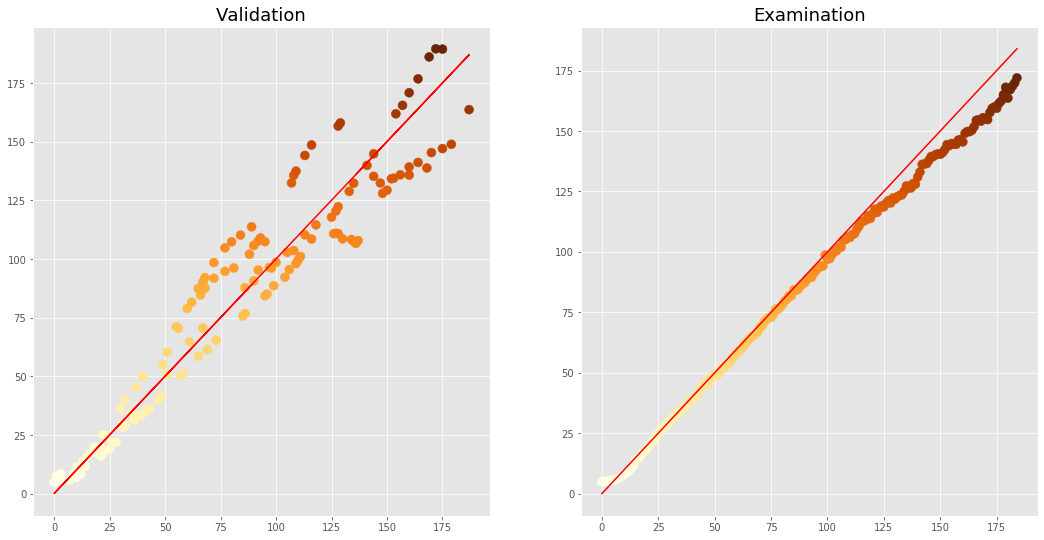

In [146]:
ridge = Ridge(alpha=1)
ridge.fit(Train_X, Train_y)
preds = ridge.predict(Test_X)
print ('Validation : ')
print ('MAE =', np.round(MAE(Test_y, preds)*0.5, 2),'hours')
print ('RMSE =', np.round(np.sqrt(MSE(Test_y, preds))*0.5, 2),'hours')


ex_preds = ridge.predict(Exam_Data.drop('target', axis=1))
print ('EXAM :')
print ('MAE =', np.round(MAE(Exam_Data.target.values, ex_preds)*0.5,2),'hours')
print ('RMSE =', np.round(np.sqrt(MSE(Exam_Data.target.values, ex_preds))*0.5,2),'hours')


ComparingfDF.loc['Ridge', 'Validation'] = np.array([np.round(MAE(Test_y, preds)*0.5, 2),
                                            np.round(np.sqrt(MSE(Test_y, preds))*0.5, 2)])
ComparingfDF.loc['Ridge', 'Exam'] = np.array([np.round(MAE(Exam_Data.target.values, ex_preds)*0.5,2),
                                      np.round(np.sqrt(MSE(Exam_Data.target.values, ex_preds))*0.5,2)])

# df_val = pd.DataFrame(columns=['true_val', 'preds_val'])
# df_ex = pd.DataFrame(columns=['true_exam', 'preds_exam'])

# df_val['true_val'] = Test_y.values
# df_val['preds_val'] = preds
# df_ex['true_exam'] = Exam_Data.target.values
# df_ex['preds_exam'] = ex_preds

fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(121)
ax1.set_title('Validation', fontsize=18)
plt.scatter(Test_y, preds, c=preds, cmap='YlOrBr', s=80)

plt.plot(Test_y, Test_y, c='r')

ax2 = fig.add_subplot(122)
ax2.set_title('Examination', fontsize=18)
plt.scatter(Exam_Data.target.values, ex_preds, c=ex_preds, cmap=YlOrBr, s=80)
plt.plot(Exam_Data.target.values, Exam_Data.target.values, c='r')


Validation : 
MAE = 5.75 hours
RMSE = 7.57 hours
EXAM :
MAE = 3.45 hours
RMSE = 4.91 hours


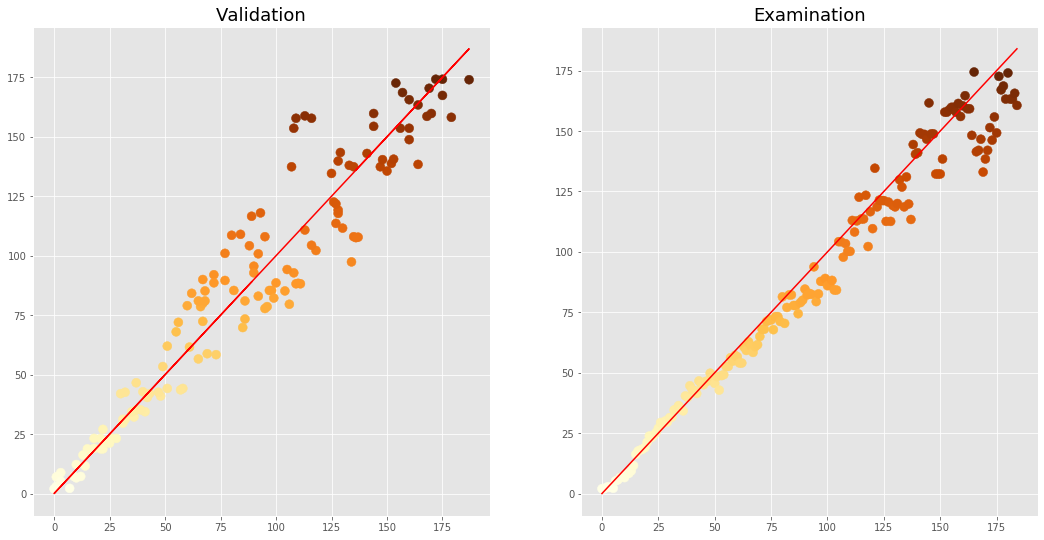

In [147]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Train_X, Train_y)
preds = knn.predict(Test_X)
print ('Validation : ')
print ('MAE =', np.round(MAE(Test_y, preds)*0.5, 2),'hours')
print ('RMSE =', np.round(np.sqrt(MSE(Test_y, preds))*0.5, 2),'hours')


ex_preds = knn.predict(Exam_Data.drop('target', axis=1))
print ('EXAM :')
print ('MAE =', np.round(MAE(Exam_Data.target.values, ex_preds)*0.5,2),'hours')
print ('RMSE =', np.round(np.sqrt(MSE(Exam_Data.target.values, ex_preds))*0.5,2),'hours')

ComparingfDF.loc['KNN', 'Validation'] = np.array([np.round(MAE(Test_y, preds)*0.5, 2),
                                            np.round(np.sqrt(MSE(Test_y, preds))*0.5, 2)])
ComparingfDF.loc['KNN', 'Exam'] = np.array([np.round(MAE(Exam_Data.target.values, ex_preds)*0.5,2),
                                      np.round(np.sqrt(MSE(Exam_Data.target.values, ex_preds))*0.5,2)])

fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(121)
ax1.set_title('Validation', fontsize=18)
plt.scatter(Test_y, preds, c=preds, cmap='YlOrBr', s=80)
plt.plot(Test_y, Test_y, c='r')

ax2 = fig.add_subplot(122)
ax2.set_title('Examination', fontsize=18)
plt.scatter(Exam_Data.target.values, ex_preds, c=ex_preds, cmap=YlOrBr, s=80)
plt.plot(Exam_Data.target.values, Exam_Data.target.values, c='r')


Validation : 
MAE = 5.54 hours
RMSE = 7.3 hours
EXAM :
MAE = 2.95 hours
RMSE = 4.19 hours


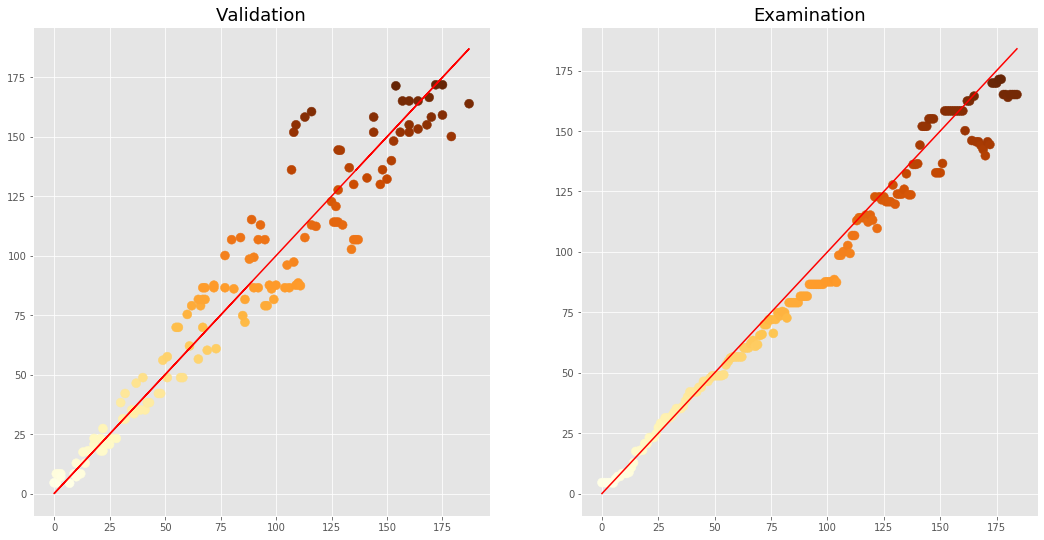

In [148]:
GB = GradientBoostingRegressor(n_estimators=60)
GB.fit(Train_X, Train_y)
preds = GB.predict(Test_X)
print ('Validation : ')
print ('MAE =', np.round(MAE(Test_y, preds)*0.5, 2),'hours')
print ('RMSE =', np.round(np.sqrt(MSE(Test_y, preds))*0.5, 2),'hours')


ex_preds = GB.predict(Exam_Data.drop('target', axis=1))
print ('EXAM :')
print ('MAE =', np.round(MAE(Exam_Data.target.values, ex_preds)*0.5,2),'hours')
print ('RMSE =', np.round(np.sqrt(MSE(Exam_Data.target.values, ex_preds))*0.5,2),'hours')


ComparingfDF.loc['GB', 'Validation'] = np.array([np.round(MAE(Test_y, preds)*0.5, 2),
                                            np.round(np.sqrt(MSE(Test_y, preds))*0.5, 2)])
ComparingfDF.loc['GB', 'Exam'] = np.array([np.round(MAE(Exam_Data.target.values, ex_preds)*0.5,2),
                                      np.round(np.sqrt(MSE(Exam_Data.target.values, ex_preds))*0.5,2)])

fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(121)
ax1.set_title('Validation', fontsize=18)
plt.scatter(Test_y, preds, c=preds, cmap='YlOrBr', s=80)
plt.plot(Test_y, Test_y, c='r')

ax2 = fig.add_subplot(122)
ax2.set_title('Examination', fontsize=18)
plt.scatter(Exam_Data.target.values, ex_preds, c=ex_preds, cmap=YlOrBr, s=80)
plt.plot(Exam_Data.target.values, Exam_Data.target.values, c='r')


In [149]:
ComparingfDF['Ex/Val Rate'] = ComparingfDF['Exam']/ComparingfDF['Validation']

### С квадратичными, кубичными и экспоненциальными признаками

In [151]:
print(*Val_Data.drop('target', axis=1).columns)

PC squared qubed exp


In [152]:
ComparingfDF

Validation  Exam Ex/Val Rate
Estimator Metrics                             
LinReg    MAE           5.71  2.57    0.450088
          RMSE          7.32  3.23    0.441257
Ridge     MAE           5.91   2.4    0.406091
          RMSE          7.48  3.32     0.44385
GB        MAE           5.54  2.95    0.532491
          RMSE           7.3  4.19    0.573973
KNN       MAE           5.75  3.45         0.6
          RMSE          7.57  4.91    0.648613